In [17]:
%cd '/root/projects/nucleus_predictor'
%matplotlib inline
import util.data
import util.data.transforms
import pandas as pd
import test_model
import model_modules.ttf_model
import os

/root/projects/nucleus_predictor


Create DataFrame from CZI and save the test set as CSV

In [3]:
path_czi = 'data/timelapse_czis/20160621_S01_001.czi'
path_save_csv = 'data/20160621_S01_001_test_set.csv'
name_signal = 'bf'
name_target = 'struct'
train_split = 0

df_train, df_test = util.data.create_train_test_dataframe_from_timelapse_czi(
        path_czi,
        name_signal=name_signal,
        name_target=name_target,
        train_split=train_split,
)
df_test.to_csv(path_save_csv, index=False)

reading: data/timelapse_czis/20160621_S01_001.czi


Build dataset from CSV and load model

In [5]:
df_test = pd.read_csv('data/20160621_S01_001_test_set.csv')
df_train = pd.DataFrame(columns=df_test.columns)  # empty train set

path_model = 'saved_models/ttf_lamin_b1_latest.p'
model = model_modules.ttf_model.Model(
    load_path=path_model,
    gpu_ids=0,
)
print('model:', model)


loading checkpoint from: saved_models/ttf_lamin_b1_latest.p
model load time: 2.4 s
model: ttf_v7_nn | iter: 50000


In [7]:
z_fac = 0.97
# xy_fac = 0.217  # timelapse czis; original scale 0.065 um/px
n_test_images = 8
save_images = False

xy_facs = [0.217]
xy_facs = [i/1000 for i in range(200, 300, 2)]
print(xy_facs)

dims_cropped = (32, '/16', '/16')
cropper = util.data.transforms.Cropper(dims_cropped, offsets=('mid', 0, 0))
transforms_provider = (cropper, cropper)
results = []
for xy_fac in xy_facs:
    path_save = os.path.join('tmp', 'xy_scale_{:.03f}'.format(xy_fac))
    resize_factors = (z_fac, xy_fac, xy_fac)
    resizer = util.data.transforms.Resizer(resize_factors)
    signal_transforms = (resizer, util.data.transforms.sub_mean_norm)
    target_transforms = (resizer, util.data.transforms.sub_mean_norm)
    transforms = (signal_transforms, target_transforms)
    ds = util.data.DataSet3(
        df_train=df_train,
        df_test=df_test,
        transforms=transforms,
    )
    ds.use_test_set()

    provider = util.data.TestImgDataProvider(
        dataset=ds,
        transforms=transforms_provider,
    )
    print('xy_fac:', xy_fac, path_save)
    kwargs = dict(
        n_images=n_test_images,
        path_save=path_save,
        save_images=save_images,
    )
    losses_dict = test_model.test_model(model, provider, **kwargs)
    losses_dict['xy_fac'] = xy_fac
    results.append(losses_dict)
    df_results = pd.DataFrame(results)
    df_results.to_csv('test_output/scale_check.csv')

[0.2, 0.202, 0.204, 0.206, 0.208, 0.21, 0.212, 0.214, 0.216, 0.218, 0.22, 0.222, 0.224, 0.226, 0.228, 0.23, 0.232, 0.234, 0.236, 0.238, 0.24, 0.242, 0.244, 0.246, 0.248, 0.25, 0.252, 0.254, 0.256, 0.258, 0.26, 0.262, 0.264, 0.266, 0.268, 0.27, 0.272, 0.274, 0.276, 0.278, 0.28, 0.282, 0.284, 0.286, 0.288, 0.29, 0.292, 0.294, 0.296, 0.298]
xy_fac: 0.2 tmp/xy_scale_0.20
reading: data/timelapse_czis/20160621_S01_001.czi


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
test image: 00 | name: 20160621_S01_001.czi | l1: 0.7710 | l2: 1.2671 | l1_norm: 1.1919 | l2_norm: 1.0945
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
test image: 01 | name: 20160621_S01_001.czi | l1: 0.7711 | l2: 1.2378 | l1_norm: 1.1920 | l2_norm: 1.0723
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
test image: 02 | name: 20160621_S01_001.czi | l1: 0.7650 | l2: 1.2367 | l1_norm: 1.1852 | l2_norm: 1.0805
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 192, None), slice(0, 192, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.7664 |

DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.7520 | l2: 1.2066 | l1_norm: 1.1561 | l2_norm: 1.0536
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 04 | name: 20160621_S01_001.czi | l1: 0.7672 | l2: 1.2525 | l1_norm: 1.1782 | l2_norm: 1.0962
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 05 | name: 20160621_S01_001.czi | l1: 0.7475 | l2: 1.1928 | l1_norm: 1.1510 | l2_norm: 1.0469
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.7577 |

DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.7278 | l2: 1.1395 | l1_norm: 1.1345 | l2_norm: 1.0312
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
test image: 07 | name: 20160621_S01_001.czi | l1: 0.7214 | l2: 1.1259 | l1_norm: 1.1323 | l2_norm: 1.0280
*****
count: 8 | l1: 0.7288 | l2: 1.1610 | l1_norm: 1.1307 | l2_norm: 1.0266
Sorted by L2 norm loss
test 05 | L2 loss: 0.9760
test 03 | L2 loss: 0.9982
test 04 | L2 loss: 1.0231
test 07 | L2 loss: 1.0280
test 02 | L2 loss: 1.0292
test 06 | L2 loss: 1.0312
test 01 | L2 loss: 1.0582
test 00 | L2 loss: 1.0692
xy_fac: 0.214 tmp/xy_scale_0.21
reading: data/timelapse_czis/20160621_S01_001.czi
DEBUG: cropper [slice(3, 35, None), slice(0, 208, None), slice(0, 208, None)]
DEBUG: c

DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 00 | name: 20160621_S01_001.czi | l1: 0.7434 | l2: 1.2633 | l1_norm: 1.1432 | l2_norm: 1.0927
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 01 | name: 20160621_S01_001.czi | l1: 0.7454 | l2: 1.2526 | l1_norm: 1.1402 | l2_norm: 1.0779
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 02 | name: 20160621_S01_001.czi | l1: 0.7341 | l2: 1.2298 | l1_norm: 1.1246 | l2_norm: 1.0633
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.7216 |

DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6923 | l2: 1.1011 | l1_norm: 1.0754 | l2_norm: 0.9738
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 04 | name: 20160621_S01_001.czi | l1: 0.6903 | l2: 1.0827 | l1_norm: 1.0701 | l2_norm: 0.9592
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 05 | name: 20160621_S01_001.czi | l1: 0.6833 | l2: 1.0471 | l1_norm: 1.0617 | l2_norm: 0.9332
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6918 |

DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6612 | l2: 0.9785 | l1_norm: 1.0305 | l2_norm: 0.8809
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 224, None), slice(0, 224, None)]
test image: 07 | name: 20160621_S01_001.czi | l1: 0.6796 | l2: 1.0397 | l1_norm: 1.0677 | l2_norm: 0.9463
*****
count: 8 | l1: 0.6780 | l2: 1.0497 | l1_norm: 1.0522 | l2_norm: 0.9254
Sorted by L2 norm loss
test 06 | L2 loss: 0.8809
test 05 | L2 loss: 0.8894
test 03 | L2 loss: 0.9188
test 01 | L2 loss: 0.9304
test 04 | L2 loss: 0.9393
test 07 | L2 loss: 0.9463
test 00 | L2 loss: 0.9465
test 02 | L2 loss: 0.9516
xy_fac: 0.234 tmp/xy_scale_0.23
reading: data/timelapse_czis/20160621_S01_001.czi
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: c

DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 00 | name: 20160621_S01_001.czi | l1: 0.6796 | l2: 1.0862 | l1_norm: 1.0473 | l2_norm: 0.9406
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 01 | name: 20160621_S01_001.czi | l1: 0.6879 | l2: 1.0735 | l1_norm: 1.0587 | l2_norm: 0.9317
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 02 | name: 20160621_S01_001.czi | l1: 0.6776 | l2: 1.0640 | l1_norm: 1.0468 | l2_norm: 0.9300
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6766 |

DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6495 | l2: 0.9689 | l1_norm: 1.0091 | l2_norm: 0.8513
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 04 | name: 20160621_S01_001.czi | l1: 0.6483 | l2: 0.9420 | l1_norm: 1.0035 | l2_norm: 0.8333
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 05 | name: 20160621_S01_001.czi | l1: 0.6463 | l2: 0.9301 | l1_norm: 1.0060 | l2_norm: 0.8282
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 240, None), slice(0, 240, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6450 |

DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6684 | l2: 0.9965 | l1_norm: 1.0258 | l2_norm: 0.8774
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 07 | name: 20160621_S01_001.czi | l1: 0.6626 | l2: 0.9872 | l1_norm: 1.0234 | l2_norm: 0.8704
*****
count: 8 | l1: 0.6722 | l2: 1.0248 | l1_norm: 1.0328 | l2_norm: 0.8936
Sorted by L2 norm loss
test 05 | L2 loss: 0.8636
test 07 | L2 loss: 0.8704
test 06 | L2 loss: 0.8774
test 03 | L2 loss: 0.8881
test 04 | L2 loss: 0.8891
test 00 | L2 loss: 0.9130
test 01 | L2 loss: 0.9236
test 02 | L2 loss: 0.9238
xy_fac: 0.254 tmp/xy_scale_0.25
reading: data/timelapse_czis/20160621_S01_001.czi
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: c

DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 00 | name: 20160621_S01_001.czi | l1: 0.6545 | l2: 0.9924 | l1_norm: 1.0077 | l2_norm: 0.8549
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 01 | name: 20160621_S01_001.czi | l1: 0.6713 | l2: 1.0207 | l1_norm: 1.0316 | l2_norm: 0.8801
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 02 | name: 20160621_S01_001.czi | l1: 0.6603 | l2: 1.0024 | l1_norm: 1.0205 | l2_norm: 0.8726
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 256, None), slice(0, 256, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6441 |

DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6674 | l2: 1.0094 | l1_norm: 1.0237 | l2_norm: 0.8720
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 04 | name: 20160621_S01_001.czi | l1: 0.6789 | l2: 1.0298 | l1_norm: 1.0362 | l2_norm: 0.8929
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 05 | name: 20160621_S01_001.czi | l1: 0.6605 | l2: 0.9859 | l1_norm: 1.0135 | l2_norm: 0.8544
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6674 |

DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6669 | l2: 0.9929 | l1_norm: 1.0334 | l2_norm: 0.8901
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 07 | name: 20160621_S01_001.czi | l1: 0.6499 | l2: 0.9567 | l1_norm: 1.0152 | l2_norm: 0.8616
*****
count: 8 | l1: 0.6645 | l2: 0.9997 | l1_norm: 1.0279 | l2_norm: 0.8824
Sorted by L2 norm loss
test 07 | L2 loss: 0.8616
test 05 | L2 loss: 0.8684
test 00 | L2 loss: 0.8686
test 01 | L2 loss: 0.8851
test 03 | L2 loss: 0.8860
test 06 | L2 loss: 0.8901
test 04 | L2 loss: 0.8948
test 02 | L2 loss: 0.9042
xy_fac: 0.274 tmp/xy_scale_0.27
reading: data/timelapse_czis/20160621_S01_001.czi
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: c

DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 00 | name: 20160621_S01_001.czi | l1: 0.6551 | l2: 0.9883 | l1_norm: 1.0084 | l2_norm: 0.8552
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 01 | name: 20160621_S01_001.czi | l1: 0.6684 | l2: 1.0208 | l1_norm: 1.0266 | l2_norm: 0.8821
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 02 | name: 20160621_S01_001.czi | l1: 0.6716 | l2: 1.0296 | l1_norm: 1.0361 | l2_norm: 0.8962
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 272, None), slice(0, 272, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6640 |

DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 03 | name: 20160621_S01_001.czi | l1: 0.6711 | l2: 1.0399 | l1_norm: 1.0396 | l2_norm: 0.9105
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 04 | name: 20160621_S01_001.czi | l1: 0.6802 | l2: 1.0412 | l1_norm: 1.0463 | l2_norm: 0.9164
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 05 | name: 20160621_S01_001.czi | l1: 0.6697 | l2: 1.0178 | l1_norm: 1.0358 | l2_norm: 0.8982
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6744 |

DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 06 | name: 20160621_S01_001.czi | l1: 0.6771 | l2: 1.0404 | l1_norm: 1.0537 | l2_norm: 0.9421
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
test image: 07 | name: 20160621_S01_001.czi | l1: 0.6557 | l2: 0.9956 | l1_norm: 1.0285 | l2_norm: 0.9062
*****
count: 8 | l1: 0.6718 | l2: 1.0343 | l1_norm: 1.0411 | l2_norm: 0.9159
Sorted by L2 norm loss
test 01 | L2 loss: 0.8902
test 00 | L2 loss: 0.8986
test 05 | L2 loss: 0.9029
test 07 | L2 loss: 0.9062
test 02 | L2 loss: 0.9244
test 03 | L2 loss: 0.9304
test 04 | L2 loss: 0.9323
test 06 | L2 loss: 0.9421
xy_fac: 0.294 tmp/xy_scale_0.29
reading: data/timelapse_czis/20160621_S01_001.czi
DEBUG: cropper [slice(3, 35, None), slice(0, 288, None), slice(0, 288, None)]
DEBUG: c

,xy_fac,l2_norm_test
32,0.264,0.851772
31,0.262,0.853358
23,0.246,0.855050
30,0.260,0.855539
24,0.248,0.857736


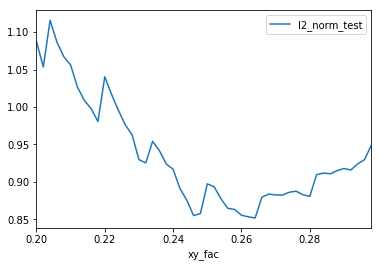

In [26]:
df_results.plot.line(x='xy_fac', y='l2_norm_test')
df_results.sort_values(by='l2_norm_test').head().loc[:, ('xy_fac', 'l2_norm_test')]